In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [38]:
train_df = pd.read_csv('./data_taxi_new_york/train.csv')
test_df = pd.read_csv('./data_taxi_new_york/test.csv')

In [39]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train_df['pickup_datetime'].min(), train_df['pickup_datetime'].max()

('2016-01-01 00:00:17', '2016-06-30 23:59:39')

In [7]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

('2016-01-01 00:00:22', '2016-06-30 23:59:58')

(array([4.62040e+04, 1.09875e+05, 1.42137e+05, 1.47773e+05, 1.41306e+05,
        1.26102e+05, 1.10927e+05, 9.53900e+04, 8.27080e+04, 6.90960e+04,
        5.79290e+04, 4.90820e+04, 4.07810e+04, 3.47700e+04, 2.90630e+04,
        2.41240e+04, 2.01000e+04, 1.70140e+04, 1.42430e+04, 1.20340e+04,
        1.01340e+04, 8.60100e+03, 7.27000e+03, 6.31800e+03, 5.46100e+03,
        4.82100e+03, 4.15300e+03, 3.62500e+03, 3.19400e+03, 2.85900e+03,
        2.43200e+03, 2.11400e+03, 1.89400e+03, 1.66700e+03, 1.45400e+03,
        1.30800e+03, 1.19200e+03, 9.86000e+02, 8.89000e+02, 7.71000e+02,
        7.12000e+02, 6.18000e+02, 5.33000e+02, 5.07000e+02, 4.41000e+02,
        3.91000e+02, 3.61000e+02, 3.05000e+02, 2.53000e+02, 2.23000e+02,
        1.90000e+02, 1.60000e+02, 1.60000e+02, 1.41000e+02, 1.10000e+02,
        1.11000e+02, 8.00000e+01, 7.70000e+01, 7.20000e+01, 5.80000e+01,
        4.90000e+01, 3.60000e+01, 3.00000e+01, 3.60000e+01, 3.40000e+01,
        3.50000e+01, 2.10000e+01, 1.90000e+01, 1.70

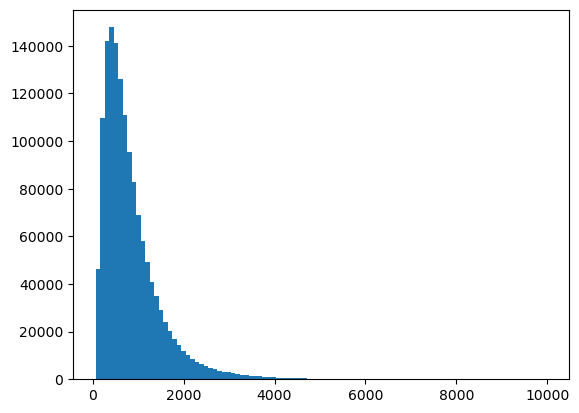

In [79]:
plt.hist(train_df['trip_duration'], bins=100)

(array([7.1700e+02, 5.1300e+02, 8.1000e+02, 6.5400e+02, 9.2000e+02,
        9.9500e+02, 1.4060e+03, 1.3390e+03, 1.7790e+03, 1.7720e+03,
        2.0730e+03, 2.6220e+03, 2.9420e+03, 3.1730e+03, 3.9810e+03,
        3.7540e+03, 5.3010e+03, 5.1830e+03, 6.2700e+03, 7.7690e+03,
        7.4480e+03, 9.8290e+03, 1.0122e+04, 1.0781e+04, 1.2447e+04,
        1.3239e+04, 1.4682e+04, 1.6732e+04, 1.7736e+04, 1.9075e+04,
        2.1251e+04, 2.1433e+04, 2.4982e+04, 2.4955e+04, 2.7048e+04,
        2.8640e+04, 2.9663e+04, 3.1683e+04, 3.2610e+04, 3.3831e+04,
        3.5969e+04, 3.6847e+04, 3.7425e+04, 3.7644e+04, 3.9098e+04,
        4.0198e+04, 3.9588e+04, 4.0233e+04, 4.0550e+04, 4.0086e+04,
        3.9586e+04, 3.9317e+04, 3.8419e+04, 3.6782e+04, 3.6527e+04,
        3.4905e+04, 3.3471e+04, 3.1906e+04, 3.0049e+04, 2.8584e+04,
        2.6388e+04, 2.4535e+04, 2.3145e+04, 2.1061e+04, 1.8686e+04,
        1.7301e+04, 1.5402e+04, 1.3669e+04, 1.2236e+04, 1.0799e+04,
        9.2740e+03, 8.2450e+03, 7.2560e+03, 6.41

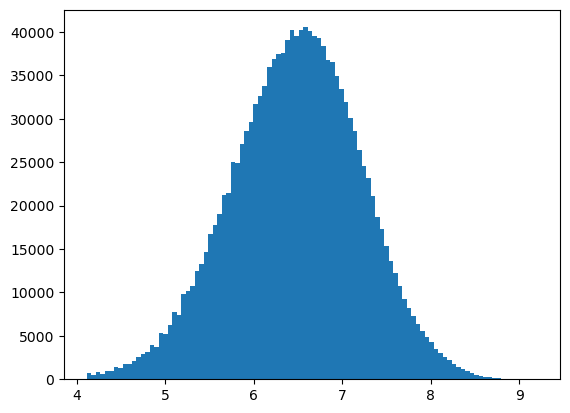

In [78]:
plt.hist(np.log(train_df['trip_duration']), bins=100)

In [42]:
train_df = train_df[ train_df['trip_duration'] < 10000]
train_df = train_df[60 <train_df['trip_duration']]

In [43]:
train_df['trip_duration'].describe()

count    1.447744e+06
mean     8.416307e+02
std      6.569204e+02
min      6.100000e+01
25%      4.010000e+02
50%      6.650000e+02
75%      1.076000e+03
max      9.984000e+03
Name: trip_duration, dtype: float64

In [50]:
train_df['pickup_dt'] = pd.to_datetime(train_df['pickup_datetime'])

In [62]:
train_df['weekday'] = train_df['pickup_dt'].dt.dayofweek

In [63]:
train_df['start_hour'] = train_df['pickup_dt'].dt.hour

In [65]:
train_df['date'] = train_df['pickup_dt'].dt.date

In [66]:
train_df['month'] = train_df['pickup_dt'].dt.month

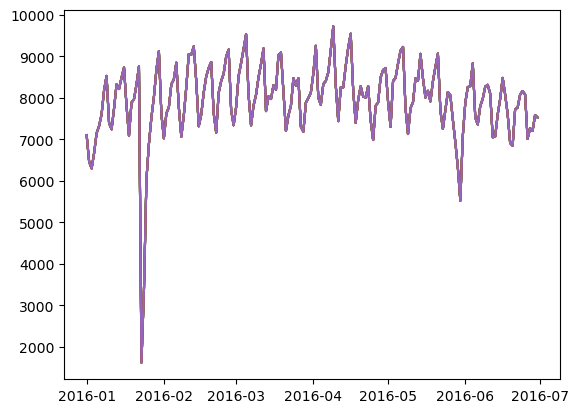

In [73]:
plt.plot(train_df.groupby('date').count())

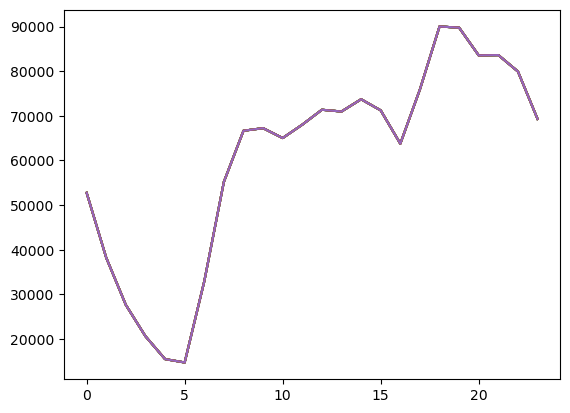

In [75]:
plt.plot(train_df.groupby('start_hour').count())

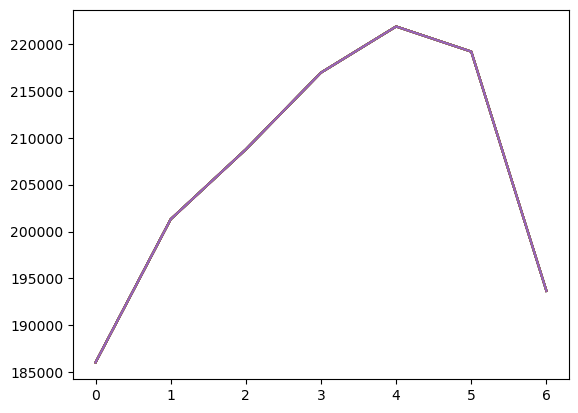

In [77]:
plt.plot(train_df.groupby('weekday').count())

- explore locations - dropoffs and pickups
- explore directions
- explore interaction of hours and days (and holidays)
- create features of days and hours
- pixelize locations